In [2]:
%pip install pillow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 1.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


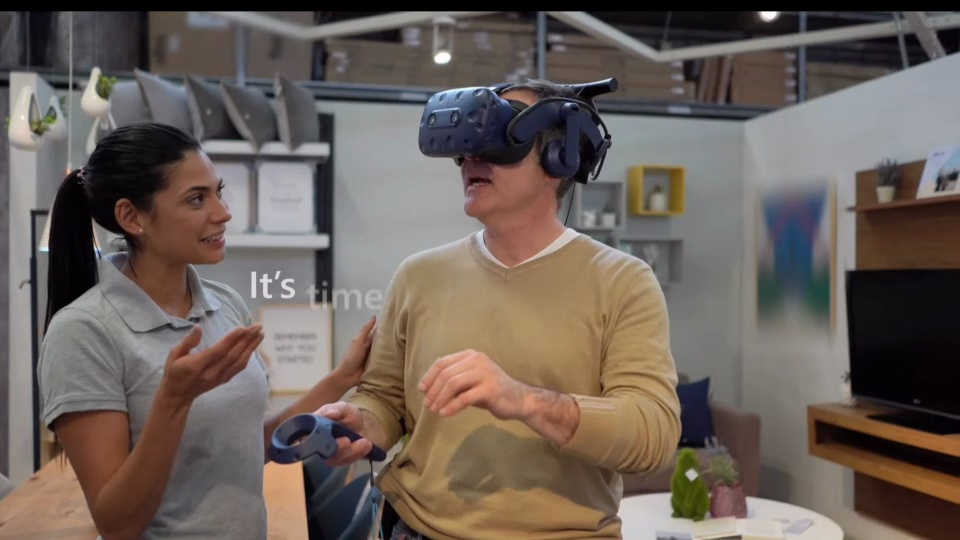

Error: Failed to capture frame.


In [6]:
import cv2
import time
import os
from IPython.display import display, Image, clear_output
from PIL import Image as PILImage
import io

# RTSP stream URL
rtsp_url = 'rtmp://192.168.5.212:1935/live/stream'

# Open the RTSP stream using OpenCV
cap = cv2.VideoCapture(rtsp_url)

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

# Set the interval to 2 seconds
interval = 2
last_capture_time = time.time()

# Loop to read the video stream
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Error: Failed to capture frame.")
        break
    
    current_time = time.time()
    if current_time - last_capture_time >= interval:
        # Convert the frame to a format that can be displayed in Jupyter
        _, buffer = cv2.imencode('.jpg', frame)
        image = PILImage.open(io.BytesIO(buffer))
        
        # Clear the previous output and display the new image
        clear_output(wait=True)
        display(image)
        
        # Update the last capture time
        last_capture_time = current_time
    
    # Check if 'q' or 'Q' is pressed to exit
    if cv2.waitKey(1) & 0xFF in [ord('q'), ord('Q')]:
        print("Exiting on user request.")
        break

# Release the video capture object
cap.release()